# Feature Description
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).ult 1 is Yes and 0 is No

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploratory Data Analysis(EDA)

## Target Feature

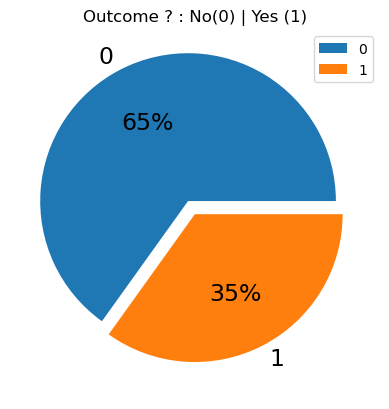

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
plt.title('Outcome ? : No(0) | Yes (1)')
plt.pie(df['Outcome'].value_counts(), autopct = '%.0f%%', labels=[0,1], textprops = {'fontsize' : 17, 'color' : 'black'}, explode = (0.1,0))
plt.legend()
plt.show()

df['Outcome'].value_counts()

## Numerical Feature

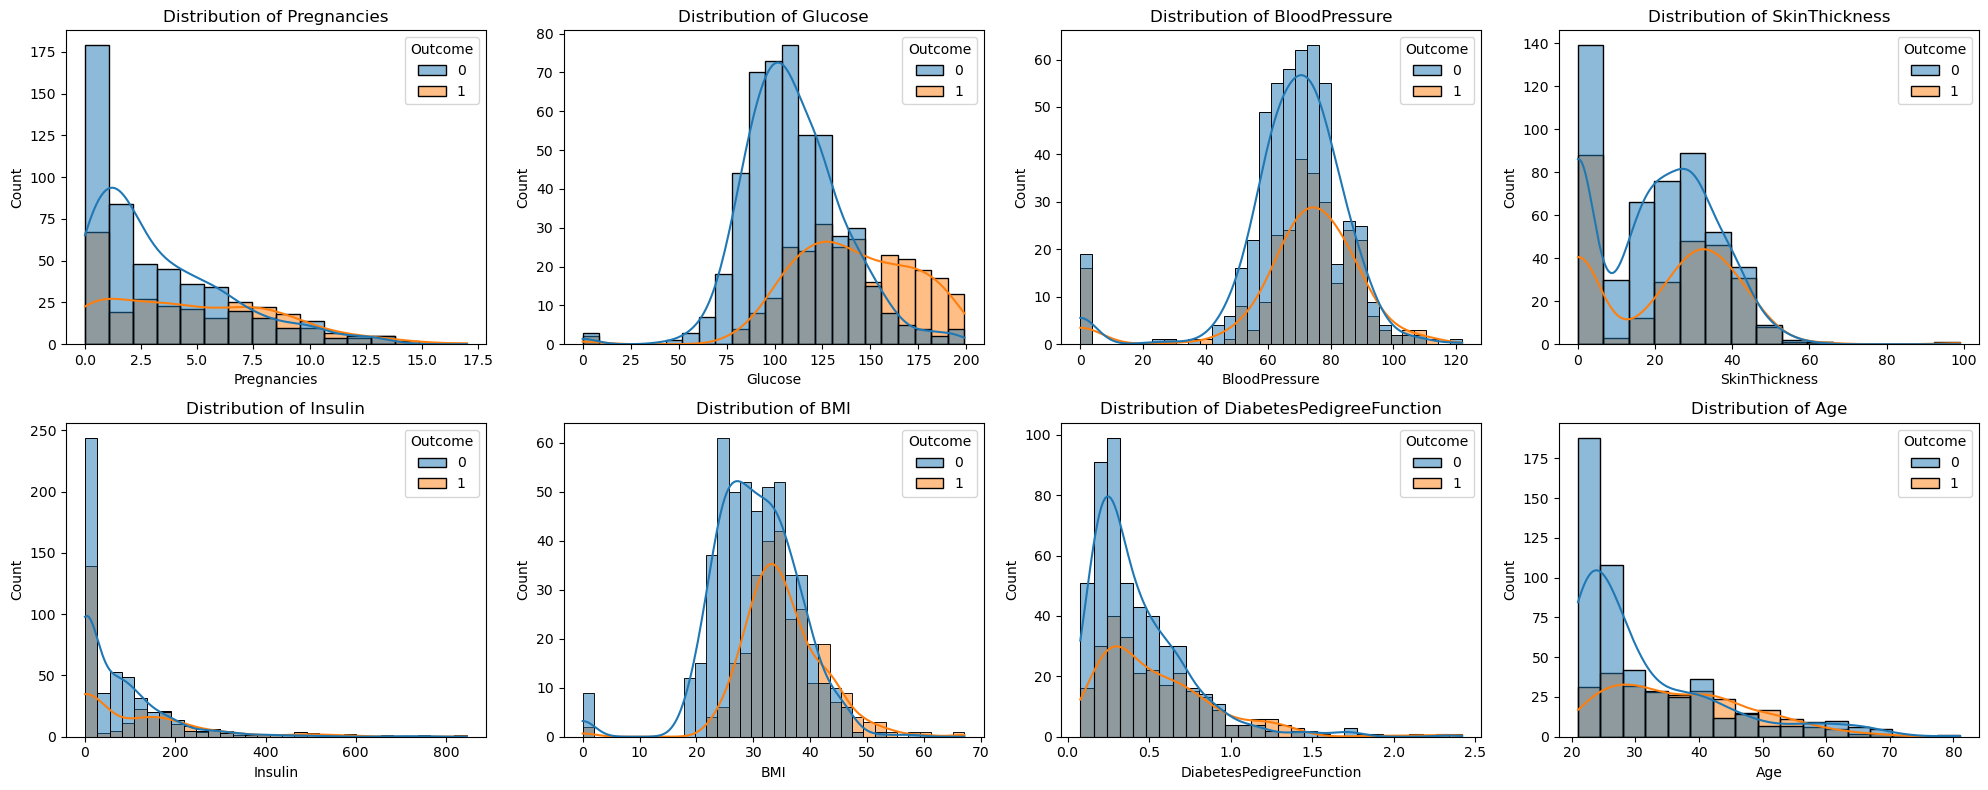

In [6]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
row = 0
col = 0
for i in df.drop(columns=['Outcome']):
    if col < 4:
        sns.histplot(data=df, x=i, hue='Outcome', kde=True, ax=axes[row][col])
        axes[row][col].set_title(f'Distribution of {i}')
        col+=1
    else:
        row+=1
        col = 0
        sns.histplot(data=df, x=i, hue='Outcome', kde=True, ax=axes[row][col])
        axes[row][col].set_title(f'Distribution of {i}')
        col+=1
plt.tight_layout()
plt.show()

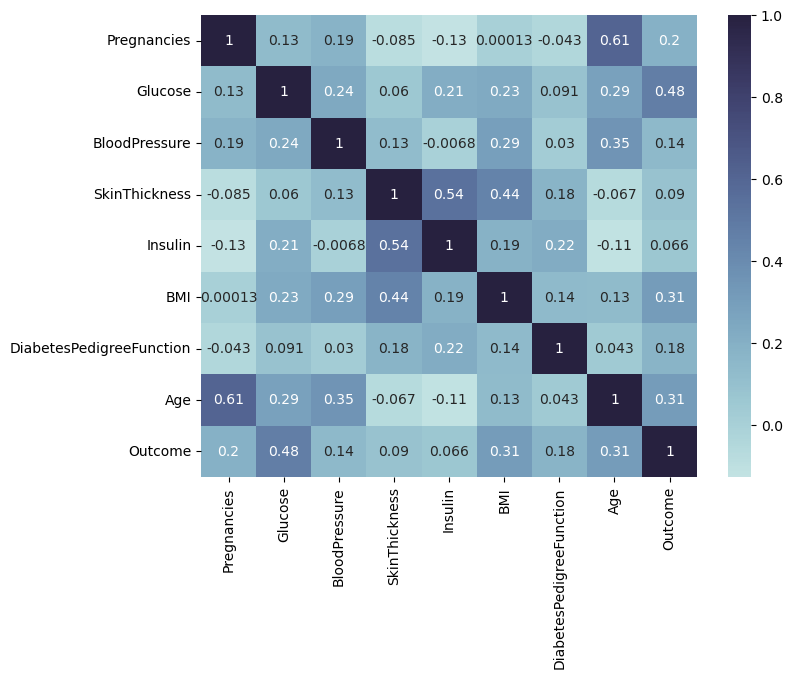

In [7]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
blue = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(df.corr('spearman'), cmap=blue, annot=True)
plt.show()

In [8]:
df.drop(columns=['Outcome']).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Based on the above plots and descriptive statistics, we can conclude:

> 1. Based on the data, there are 268 people with diabetes and 500 without.
> 2. All data distribution is not normal (skew) but some features have near normal distribution such as BloodPressure and BMI.
> 3. The largest correlation between features is shown by Pregnancies with Age at 0.61, then Insulin with SkinThickness at 0.54 and SkinThickness with BMI at 0.44.
> 4. Pregnancies Mean = 3.84, MIn = 0, Max = 17.
> 5. Glucose Mean = 120.9, Min = 0, Max = 199.
> 6. BloodPressure Mean = 69.1, Min = 0, Max = 122.
> 7. SkinThickness Mean = 20.53, Min = 0, Max = 99.
> 8. Insulin Mean = 79.8, Min = 0, Max = 846.
> 9. BMI Mean = 32, Min = 0, Max = 67.1.
> 10. DiabetesPedigreeFunction Mean-0.47, Min=0.078, Max=2.42.
> 11. Age Mean=33.24, Min=21, Max=81.

# Feature Engineering

## Feature Encoding

In [9]:
df['Outcome'] = LabelEncoder().fit_transform(df['Outcome'])

## Feature Scalling

In [10]:
scalar = MinMaxScaler()

for i in df.drop(columns=['Outcome']):
    df[i] = scalar.fit_transform(df[[i]])

# Modelling

## ANN
An artificial neural network (ANN) is a computational model that is inspired by the way biological neural networks work. These models are used to recognize patterns, cluster data, and make predictions.

ANNs are composed of a large number of interconnected processing nodes, or neurons, that can learn to recognize patterns of input data. The connections between nodes are called edges. Each node has a weight that determines the strength of the connection to other nodes.

In [11]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_shape=[8], units=16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', metrics=['acc'], loss='binary_crossentropy')
history = model.fit(x_train,y_train, epochs=500, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - acc: 0.3669 - loss: 0.7602 - val_acc: 0.3052 - val_loss: 0.7395
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.3669 - loss: 0.7169 - val_acc: 0.3052 - val_loss: 0.7107
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3705 - loss: 0.6987 - val_acc: 0.3506 - val_loss: 0.6968
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4268 - loss: 0.6928 - val_acc: 0.5519 - val_loss: 0.6886
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6056 - loss: 0.6832 - val_acc: 0.6623 - val_loss: 0.6834
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7000 - loss: 0.6791 - val_acc: 0.7143 - val_loss: 0.6780
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7067 - loss: 0.6744 - val_acc: 0.7013 - val_loss: 0.6734
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7287 - loss: 0.6721 - val_acc: 0.7273 - val_loss: 0.6701
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.72

In [15]:
y_pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


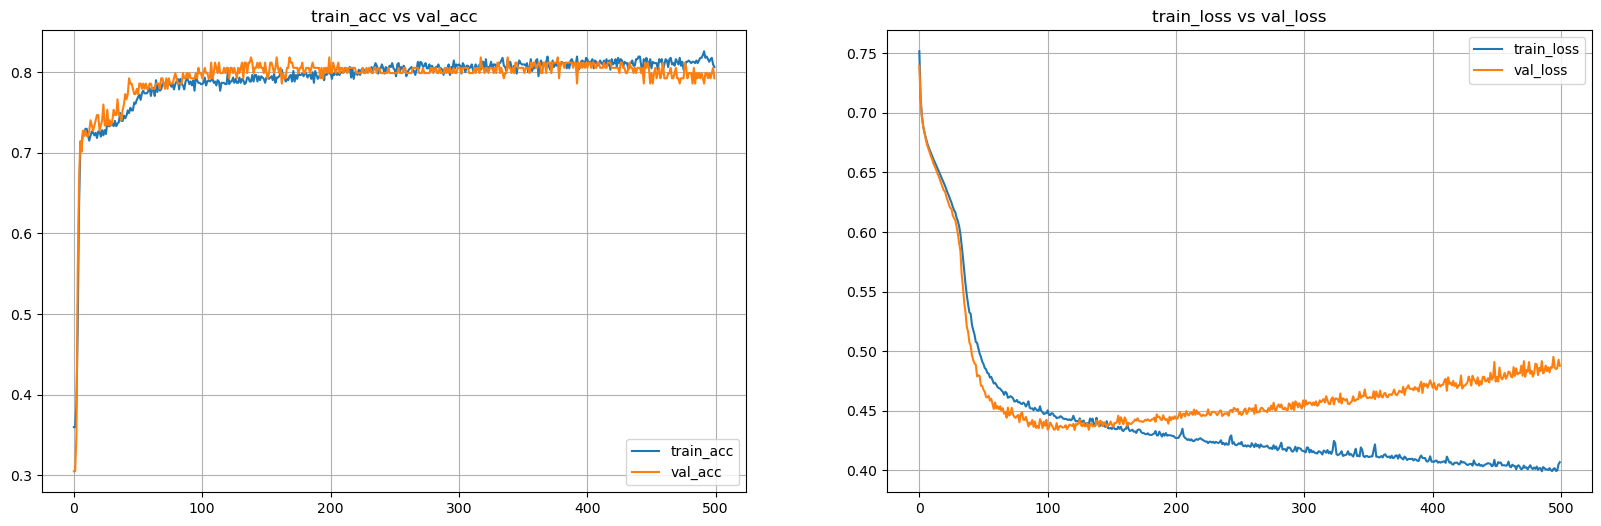

In [16]:
fig, axes = plt.subplots(1,2, figsize=[20,6])
sns.lineplot(data=history.history['acc'], ax=axes[0], label='train_acc')
sns.lineplot(data=history.history['val_acc'], ax=axes[0], label='val_acc')
axes[0].set_title('train_acc vs val_acc')


sns.lineplot(data=history.history['loss'], ax=axes[1], label='train_loss')
sns.lineplot(data=history.history['val_loss'], ax=axes[1], label='val_loss')
axes[1].set_title('train_loss vs val_loss')


axes[0].grid(True)
axes[1].grid(True)
plt.show()

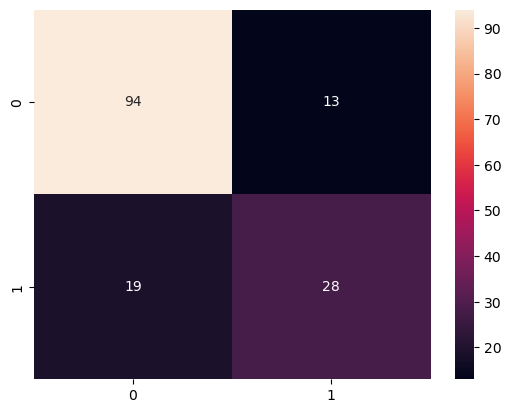

In [17]:
sns.heatmap(confusion_matrix(y_test,tf.round(y_pred)), annot=True)
plt.show()

In [18]:
print(classification_report(y_test, tf.round(y_pred)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       107
           1       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



### Based on the above results

> 1. Train accuracy score is in the range of 30%-82%.
> 2. The validation accuracy score is in the range of 30%-80%.
> 3. Training loss score is in the range of 75%-40%.
> 4. The validation loss score is in the 75%-50% range.
> 5. The accuracy score in the classification_report is 79%.
> 6. Model is neither overfit or underfit.

# Conclusion
> 1. Based on the data, there are 268 people with diabetes and 500 without.
> 2. All data distribution is not normal (skew) but some features have near normal distribution such as BloodPressure and BMI.
> 3. The largest correlation between features is shown by Pregnancies with Age at 0.61, then Insulin with SkinThickness at 0.54 and SkinThickness with BMI at 0.44.
> 4. Pregnancies Mean = 3.84, MIn = 0, Max = 17.
> 5. Glucose Mean = 120.9, Min = 0, Max = 199.
> 6. BloodPressure Mean = 69.1, Min = 0, Max = 122.
> 7. SkinThickness Mean = 20.53, Min = 0, Max = 99.
> 8. Insulin Mean = 79.8, Min = 0, Max = 846.
> 9. BMI Mean = 32, Min = 0, Max = 67.1.
> 10. DiabetesPedigreeFunction Mean-0.47, Min=0.078, Max=2.42.
> 11. Age Mean=33.24, Min=21, Max=81.
> 12. Train accuracy score is in the range of 30%-82%.
> 13. The validation accuracy score is in the range of 30%-80%.
> 14. Training loss score is in the range of 75%-40%.
> 15. The validation loss score is in the 75%-50% range.
> 16. The accuracy score in the classification_report is 79%.
> 17. Model is neither overfit or underfit.